# Titanic Survival Prediction

## User Interface

In [1]:
user_age = input('Age (example: 20): ')
user_sex = input('Sex male or female? (example: male): ')
user_fare = input('Fare (Pound) (example: 10): ')
user_class = input('Class Third, Second or First? (example: Second): ')
user_is_alone = input('Do you come alone ? y or n (example: n): ')

Age (example: 20): 25
Sex male or female? (example: male): male
Fare (Pound) (example: 10): 10
Class Third, Second or First? (example: Second): First
Do you come alone ? y or n (example: n): n


## Library

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

## Data Preparation

In [3]:
training_set = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv');
testing_set = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv');

y_train = training_set.pop('survived')
y_test = testing_set.pop('survived')

In [4]:
training_set.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
testing_set.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


## Feature Engineering

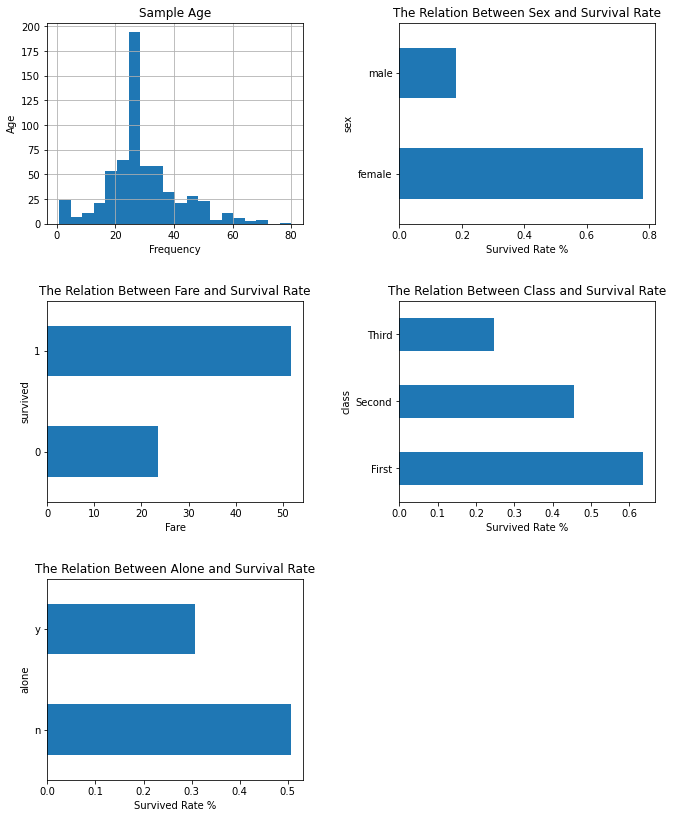

In [6]:
plt.figure(figsize = (10, 12))
plt.subplot(3, 2, 1)

training_set.age.hist(bins = 20)
plt.title('Sample Age')
plt.xlabel('Frequency')
plt.ylabel('Age')

plt.subplot(3, 2, 2)
pd.concat([training_set, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh')
plt.title('The Relation Between Sex and Survival Rate')
plt.xlabel('Survived Rate %')

plt.subplot(3, 2, 3)
pd.concat([training_set, y_train], axis = 1).groupby('survived').fare.mean().plot(kind = 'barh')
plt.title('The Relation Between Fare and Survival Rate')
plt.xlabel('Fare')

plt.subplot(3, 2, 4)
pd.concat([training_set, y_train], axis = 1).groupby('class').survived.mean().plot(kind = 'barh')
plt.title('The Relation Between Class and Survival Rate')
plt.xlabel('Survived Rate %')

plt.subplot(3, 2, 5)
pd.concat([training_set, y_train], axis = 1).groupby('alone').survived.mean().plot(kind = 'barh')
plt.title('The Relation Between Alone and Survival Rate')
plt.xlabel('Survived Rate %')

plt.tight_layout(pad=3.0)

In [7]:
selected_categorical_features = ['sex', 'class', 'alone']
selected_numerical_features = ['age', 'fare']

feature_columns = []
for feature_name in selected_categorical_features:
    vocabulary = training_set[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in selected_numerical_features:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# Input Function

In [8]:
def make_input_function(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_function = make_input_function(training_set, y_train)
test_input_function = make_input_function(testing_set, y_test, num_epochs = 1, shuffle = False)

# Train Model

In [9]:
linear_estimator = tf.estimator.LinearClassifier(feature_columns = feature_columns)
linear_estimator.train(train_input_function)
clear_output()

# Model Accuracy

In [10]:
evaluation = linear_estimator.evaluate(test_input_function)
clear_output()
print('Model Accuracy is', '{0:.2f}'.format(evaluation['accuracy'] * 100), '%')

Model Accuracy is 75.38 %


# Your survival rate

In [11]:
user_df = {
    'sex': [user_sex],
    'age': [float(user_age)],
    'fare': [float(user_fare)],
    'class': [user_class],
    'alone': [user_is_alone],
    'survived': [float(0)]
}
user_df = pd.DataFrame(user_df, columns = ['sex', 'age', 'fare', 'class', 'alone', 'survived'])
y_user = user_df.pop('survived')

user_input_function = make_input_function(user_df, y_user, num_epochs = 1, shuffle = False)
predicted_result = list(linear_estimator.predict(user_input_function))

clear_output()
print('Your survival rate is', '{0:.2f}'.format(predicted_result[0]['probabilities'][1] * 100), '%')

Your survival rate is 25.11 %
